In [21]:
import os 
import numpy as np
from PIL import Image as pil_image
import matplotlib.pyplot as plt
import tensorflow as tf 

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [22]:
PATH="/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/Saline_bottle_original_size/"
folders=['sal_data_100','sal_data_50','sal_data_80','sal_data_empty']
list_input = ['sal_data_100','sal_data_50','sal_data_80','sal_data_empty']

def create_classes(list_input):
    classes_dict = {}
    count_dict = {}
    for i in range(len(folders)):
        key_word= folders[i]
        if key_word in list_input:
            #get the index of the list:
            index = list_input.index(key_word)
            classes_dict[key_word] = index
        else:
            count_dict[key_word] = 0
            classes_dict[key_word] = len(list_input)
    return classes_dict, count_dict
classes_dict, count_dict = create_classes(list_input)
print(classes_dict)



{'sal_data_100': 0, 'sal_data_50': 1, 'sal_data_80': 2, 'sal_data_empty': 3}


In [23]:
resize_path= os.getcwd()
print(resize_path)
resize_path=os.path.join(resize_path,"resize_sal_data_temp_del/")
print(resize_path)

data_label_path = os.getcwd()
data_label_path=os.path.join(data_label_path,"data_label/")
print(data_label_path)

if not os.path.isdir(data_label_path):
    print("Creating the directory")
    os.makedirs(data_label_path)

if not os.path.isdir(resize_path):
    print("Creating the directory")
    os.makedirs(resize_path)

for label in folders:
    label_dir=os.path.join(resize_path,label)
    if not os.path.isdir(label_dir):
        os.makedirs(label_dir)

/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER
/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER/resize_sal_data_temp_del/
/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER/data_label/


In [24]:
img_dir=os.listdir(PATH)
print(img_dir)
img_dir.remove(".DS_Store") 
print(img_dir)

data_file = open("data_label/saline_data_label.txt",'w')

for dir in img_dir:
    img_path=PATH + "/" + dir
    for img in os.listdir(img_path):
        print(dir+'/'+img)
        data_file.write(dir+'/'+img+"\n")

data_file.close() 

['sal_data_100', '.DS_Store', 'sal_data_50', 'sal_data_empty', 'sal_data_80']
['sal_data_100', 'sal_data_50', 'sal_data_empty', 'sal_data_80']
sal_data_100/IMG20200208150700.jpg
sal_data_100/IMG20200208145457.jpg
sal_data_100/IMG20200208150037_01.jpg
sal_data_100/IMG20200208150927.jpg
sal_data_100/IMG20200208150933.jpg
sal_data_100/IMG20200208150502.jpg
sal_data_100/IMG20200208150129_01.jpg
sal_data_100/IMG20200208150258.jpg
sal_data_100/IMG20200208143556.jpg
sal_data_100/IMG20200208150705_01.jpg
sal_data_100/IMG20200208145243_01.jpg
sal_data_100/IMG20200208142714.jpg
sal_data_100/IMG20200208145709.jpg
sal_data_100/IMG20200208150304.jpg
sal_data_100/IMG20200208150125_01.jpg
sal_data_100/IMG20200208143422.jpg
sal_data_100/IMG20200208150338.jpg
sal_data_100/IMG20200208150709_01.jpg
sal_data_100/IMG20200208142927.jpg
sal_data_100/IMG20200208150648.jpg
sal_data_100/IMG20200208145245.jpg
sal_data_100/IMG20200208143146.jpg
sal_data_100/IMG20200208145400_01.jpg
sal_data_100/IMG20200208145500_

In [25]:
from PIL import Image
import PIL.ImageOps  
import cv2
res=64
# open the label/data file
f = open("data_label/saline_data_label.txt", "r")
# form list from the given file
lines = f.readlines()
X_org = []
Y_org = []
# Mention the resize image shape
size=(res,res)
resize_loc_path=resize_path
for line in lines:
  try:
    # remove the \n 
    line = line.strip('\n')
    # separate label and data
    label, file_name = line.split("/")
    # folders contains all the required labels
    if label in folders:
       file_path = PATH + label + "/" + file_name
       # open the original size image
       img=pil_image.open(file_path)

       #to use negative on images 
        ##inverted_img = PIL.ImageOps.invert(img)

       #to convert to YCrCb
       imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB) # or inverted_img 

       # resize the original image to the size mentioned
       img_reshape=inverted_img.resize(size) ## choose: img, imgYCC, inverted_img
        #print(img_reshape.format, img_reshape.size, img_reshape.mode)
       # Location of the resized image as per the label
       resize_loc= resize_loc_path + label + "/" + file_name
       # checks if the resized is does not exist already 
       if file_name not in resize_loc_path + label + "/":
          img_reshape.save(resize_loc)
       # converting the image object to 
       np_im = np.array(img_reshape)
       class_number=classes_dict[label] 
       X_org.append(np_im)
       Y_org.append(class_number)
       

  except Exception as e:
           print(str(e))
    
X_org = np.array(X_org)
Y_org = np.array(Y_org)
np.save('Y_org.npy', Y_org)
np.save('X_org.npy', X_org)

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'

OpenCV(4.6.0) :-1: error: (-5:Bad a

In [55]:
print(Y_org[:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [6]:
augmented_path= os.getcwd()
print(augmented_path)
augmented_path=os.path.join(augmented_path,"resize_sal_data_augmented/")
if not os.path.isdir(augmented_path):
    print("Creating the directory")
    os.makedirs(augmented_path)
    
for label in folders:
    label_dir=os.path.join(augmented_path,label)
    if not os.path.isdir(label_dir):
        os.makedirs(label_dir)


/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER
Creating the directory


In [7]:
print(augmented_path)
print(os.getcwd())

/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER/resize_sal_data_augmented/
/Users/belhouariayoub/Documents/ISMIN3A/Embedded IA/PROJETBELHOUARIDAHER


In [13]:
from PIL import Image
import PIL.ImageOps  
import cv2
res = 64
# open the label/data file
f = open("data_label/saline_data_label.txt", "r")
# form list from the given file
lines = f.readlines()
X_aug = []
Y_aug = []
# Mention the resize image shape
size=(res,res)

augmented_loc_path=augmented_path

#data generator
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

for line in lines:
  try:
    # remove the \n 
    line = line.strip('\n')
    # separate label and data
    label, file_name = line.split("/")
    # folders contains all the required labels
    if label in folders:
       file_path = PATH + label + "/" + file_name
       # open the original size image
       img=pil_image.open(file_path)
       
       #to use inverted images 
       inverted_img = PIL.ImageOps.invert(img)

       #to convert to YCrCb
       #imgYCC = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB) # or inverted_img 

       # resize the original image to the size mentioned
       img_reshape=inverted_img.resize(size) ## choose: img, imgYCC, inverted_img
       #print(img_reshape.format, img_reshape.size, img_reshape.mode)
       # Location of the resized image as per the label
       augmented_loc= augmented_loc_path + label + "/" + file_name
       aug_dir=augmented_loc_path + label
        
       x = img_to_array(img_reshape)  # this is a Numpy array with shape (3, 32, 32) if size = 32,32
       x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 32, 32) if size = 32,32
        
       # checks if the resized is does not exist already 
       img_reshape.save(augmented_loc)
       # the .flow() command below generates batches of randomly transformed images
       # and saves the results to the directory
       i = 0
       for batch in datagen.flow(x, batch_size=1,
                                 save_to_dir=aug_dir, save_prefix='IMG_AUG', save_format='jpg'):
           i += 1
           if i > 20:
               break  # otherwise the generator would loop indefinitely
        
        
       # converting the image object to 
       np_im = np.array(img_reshape)
       class_number=classes_dict[label] 
       X_aug.append(np_im)
       Y_aug.append(class_number)
       

  except Exception as e:
           print(str(e))
    
X_aug = np.array(X_aug)
Y_aug = np.array(Y_aug)



In [14]:
np.save('Y_aug.npy', Y_aug)
np.save('X_aug.npy', X_aug)

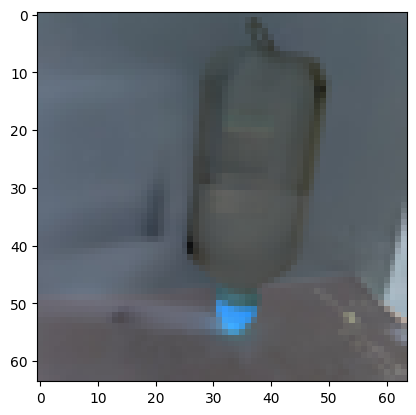

In [18]:
plt.imshow(X_aug[1878])

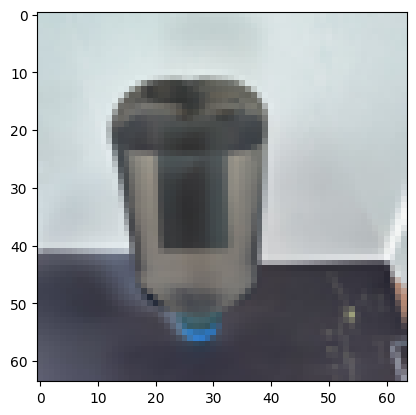

In [50]:
X1=np.load("X_org.npy")
plt.imshow(X1[1000])

In [33]:
X3=tf.keras.layers.Concatenate(axis=0)([X1,X2])

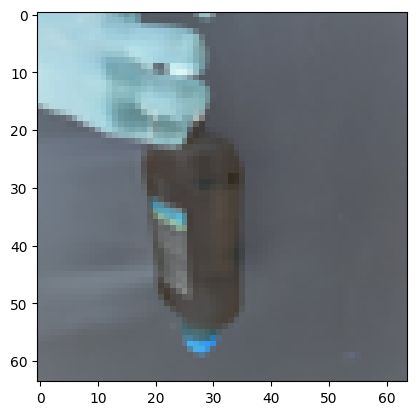

In [43]:
plt.imshow(X1[0])

In [19]:
PIL.Image.open(str(X_aug[0]))

OSError: [Errno 63] File name too long: '[[[167 210 221]\n  [168 210 222]\n  [168 210 222]\n  ...\n  [100 104 113]\n  [102 105 114]\n  [103 106 115]]\n\n [[171 211 223]\n  [168 210 222]\n  [168 210 222]\n  ...\n  [ 99 103 112]\n  [101 104 113]\n  [102 105 114]]\n\n [[173 212 223]\n  [173 212 223]\n  [171 212 223]\n  ...\n  [ 99 103 112]\n  [100 104 113]\n  [101 105 114]]\n\n ...\n\n [[106 111 117]\n  [105 110 116]\n  [105 110 116]\n  ...\n  [ 95 100 106]\n  [ 96 101 107]\n  [ 98 103 109]]\n\n [[107 112 118]\n  [106 111 117]\n  [105 110 116]\n  ...\n  [ 96 101 107]\n  [ 97 102 108]\n  [ 98 103 109]]\n\n [[108 112 118]\n  [107 111 118]\n  [106 110 117]\n  ...\n  [ 97 102 107]\n  [ 97 102 109]\n  [ 99 103 109]]]'

In [20]:
print(X_aug.shape)

(4217, 64, 64, 3)
